# Dimensionality reduction 1
## PCA and SVD
    Linear dimensionality reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Principal Component Analysis
- Linear dimensionality reduction method
- Find optimal orthogonal transformation such that covariance between the new dimensions is 0
    - Exploits eigen decomposition
    - By the orthogonal transformation, we could ignore the low variance direction to reduce the dimensionality of the features.
- Transformations
    - Find the basis (eigen vector of covariance matrix) such that independent each other
    - Diagonalization by changing the basis (inner-product of the original matrix and basis (new coordinate system)) 
    $
    \mathbf{X} \text{: Data original coordinates}
    \\
    \hat{\mathbf{X}} \text{: Centralized dataset}
    \\
    \mathbf{\Gamma} \text{: New coordinate system (Eigen vectors matrix)}
    \\
    \mathbf{\Lambda} \text{: Variance of respective direction (Eigen values matrix)}
    \\
    $$
    Eigen Decomposition of covariance matrix of original data
    $$
    \Sigma_{\hat{\mathbf{X}}} =  \mathbf{\Gamma} \mathbf{\Lambda} \mathbf{\Gamma}^T
    $
    
        New coordinate system
    $$\mathbf{\Gamma}$$

        Variance of each direction
        Covariance matrix on the new coordinate
    $$\mathbf{\Lambda}$$
    $$

# PCA
### Process of principal component analysis
Given input
Args
$\mathbf{X} \text{: array, shape[N, D]}$
- N : #samples, D : features dimensions

1. Calculate the mean over samples
$$\mathbf{x_m} \text{: array, shape [D, 1]}$$

2. Centralized (Standardized) the given data matrix around the mean $\mathbf{x_m}$
$$\hat{\mathbf{X}} = X - x_m[\text{none}, :]$$
$$\text{or}$$
$$\hat{\mathbf{X}} = X -  1_N@x_m^T$$

3. Calculate the covariance matrix of the centralized data matrix 
$$\Sigma_{\hat{\mathbf{X}}} = \frac{1}{N}\hat{\mathbf{X}}^T\hat{\mathbf{X}}$$

4. Eigendecomposition
   - Derived the eigen values and eigenvectos of $\Sigma_{\hat{\mathbf{X}}}$ 
$$
\Sigma_{\hat{\mathbf{X}}} = \mathbf{\Gamma}\mathbf{\Lambda}\mathbf{\Gamma^T}
$$

   - $\mathbf{\Gamma}$ : Eigenvector matrix, shape[D, D]
     - Orthonormal matrix
       - All rows are independent with each other.
   - $\mathbf{\Lambda}$ : Eigenvalue matrix, dig(1, .... , D)
     - variance of each direction
     - none-covariance between the direction
     - Directions (new coordinate systems) are independent with each other

5. Plot the original data $\mathbf{X}$ and the eigenvectors to a single diagram
   - To obtain optimal diagonal transformation system onto M-dim space
   - We need to prune the eigenvectors' matrix leaving out only corresponding M the largest eigenvalues
   - We could obtain the 
   - $\mathbf{\Gamma_{prune}}$: some columns are zero


6. Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis (project the vectors in $\mathbf{X}$ onto the M-dim subspace).

    Transformed dataset
$$\mathbf{Y}=\mathbf{X}\mathbf{\Gamma}$$
    Covariance matrix of transformed dataset
$$\mathbf{\Sigma_\mathbf{Y}}=\mathbf{\Lambda}=\mathbf{\Gamma}^T{\mathbf{\Sigma_{\hat{\mathbf{X}}}}}\mathbf{\Gamma}$$

The given data X

In [2]:
X = np.array([(-3,-2),(-2,-1),(-1,0),(0,1),
              (1,2),(2,3),(-2,-2),(-1,-1),
              (0,0),(1,1),(2,2), (-2,-3),
              (-1,-2),(0,-1),(1,0), (2,1),(3,2)])

N, D = X.shape[0], X.shape[1]

print(f"shape: {X.shape}")
print(f"sample: {N}")
print(f"features: {D}")

for idx, x in enumerate(X):
    print(f'    {x}')

shape: (17, 2)
sample: 17
features: 2
    [-3 -2]
    [-2 -1]
    [-1  0]
    [0 1]
    [1 2]
    [2 3]
    [-2 -2]
    [-1 -1]
    [0 0]
    [1 1]
    [2 2]
    [-2 -3]
    [-1 -2]
    [ 0 -1]
    [1 0]
    [2 1]
    [3 2]


1. Calculate the mean over samples
$$\mathbf{x_m} \text{: array, shape [D, 1]}$$

In [3]:
# Axis = over which axis we take mean
# Keepdims(False) for the subsequent operation
# To use augumentation in the following operation, 
# we should squeeze the dimension of the derived mean of data vectors over samples
x_m = X.mean(0, keepdims=False)
print(x_m)
print(f"shape: {x_m.shape}")

[0. 0.]
shape: (2,)


2. Centralized (Standardized) the given data matrix around the mean $\mathbf{x_m}$
$$\hat{\mathbf{X}} = X - x_m[None, :]$$
$$\text{or}$$
$$\hat{\mathbf{X}} = X - x_m^T 1_N$$

In [4]:
X_hat = X - x_m[None, :]
## alternative
# rx_m = X.mean(0, keepdims=True)
# one_n = np.ones((N, 1))
# print(f"1_N shape: {one_n.shape}")
# X_hat = X - one_n @ rx_m
print(X_hat)
print(f"shape: {X_hat.shape}")

[[-3. -2.]
 [-2. -1.]
 [-1.  0.]
 [ 0.  1.]
 [ 1.  2.]
 [ 2.  3.]
 [-2. -2.]
 [-1. -1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  2.]
 [-2. -3.]
 [-1. -2.]
 [ 0. -1.]
 [ 1.  0.]
 [ 2.  1.]
 [ 3.  2.]]
shape: (17, 2)


3. Calculate the covariance matrix of the centralized data matrix 
$$\Sigma_{\hat{\mathbf{X}}} = \frac{1}{N}\hat{\mathbf{X^T}}\hat{\mathbf{X}}$$

In [5]:
C_X = X_hat.transpose() @ X_hat
C_X = C_X * (1/N)
# print(C_X)
print(f"shape: {C_X.shape}")

shape: (2, 2)


# Function to get covariance matrix

In [6]:
def get_covariance(X):
    """
    Args:
        X: array[N, D]
        data matrix including each data vectors on original space (Usually, Cartesian Space)
    Return:
        C_X: array[N, N]
        covariance matrix of the centralized data of given data matrix X
    """

    # taking mean over samples
    # x_m: array(D)

    x_m = X.mean(0, keepdims=False)
    
    # Centralized X
    # X_hat: array[N, D], dtype=Float

    X_hat = X - x_m[None, :]

    # Calculating the covariance matrix of the centralized data X_hat
    # C_X: array[N, N], dtype=Float

    C_X = X_hat.transpose() @ X_hat
    # Normalization
    C_X *= (1/N)

    return C_X

4. Eigendecomposition
   - Derived the eigen values and eigenvectos of $\Sigma_{\hat{\mathbf{X}}}$ 
$$
\Sigma_{\hat{\mathbf{X}}} = \mathbf{\Gamma}\mathbf{\Lambda}\mathbf{\Gamma^T}
$$

   - $\mathbf{\Gamma}$ : Eigenvector matrix, shape[D, D]
     - Orthonormal matrix
       - All rows are independent with each other.
   - $\mathbf{\Lambda}$ : Eigenvalue matrix, dig(1, .... , D)
     - variance of each direction
     - none-covariance between the direction
     - Directions (new coordinate systems) are independent with each other

Using Numpy eigendecomposition function
- numpy.linalg.eig function

In [7]:
eig_values, eig_vectors = np.linalg.eig(C_X)
print(f"Gamma:{eig_vectors.shape}\n {eig_vectors}")
print(f"Lammda:{eig_values.shape}\n {eig_values}")
max_dim = np.argmax(eig_values)
print(max_dim)

Gamma:(2, 2)
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Lammda:(2,)
 [5.29411765 0.35294118]
0


In [8]:
I = np.eye(len(eig_values))
print(I.shape)

_dig_eig_values = I * eig_values
print(f"diagonal mat\n {_dig_eig_values}")

(2, 2)
diagonal mat
 [[5.29411765 0.        ]
 [0.         0.35294118]]


In [9]:
def get_eigen(Cov_x):
    """
    Args (1):
        Cov_x : array[D, D]
            Covariance matrix of the standardized given data matrix X
    
    Returns (2):
        g : array[D, D]
            eigen_vectors matrix
        
        l : array[D, D]
            eigen_values diagonal matrix
    """

    D = Cov_x.shape[0]

    l, g = np.linalg.eig(Cov_x)
    I = np.eye(D)
    l = I * l[None, :]

    return g, l


5. Plot the original data $\mathbf{X}$ and the eigenvectors to a single diagram
   - To obtain optimal diagonal transformation system onto M-dim space
   - We need to prune the eigenvectors' matrix leaving out only corresponding M the largest eigenvalues
   - We could obtain the 
   - $\mathbf{\Gamma_{prune}}$: some columns are zero

(-3.3, 3.3, -3.3, 3.3)

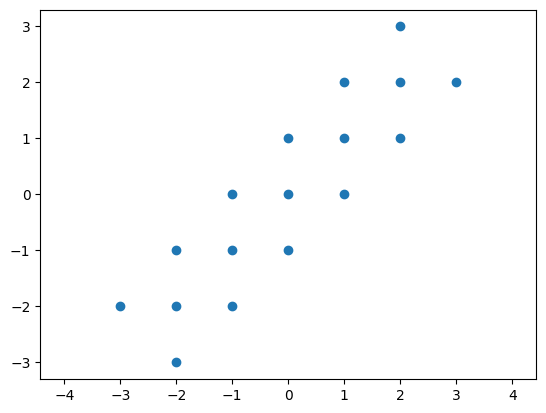

In [10]:
# plot given data
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

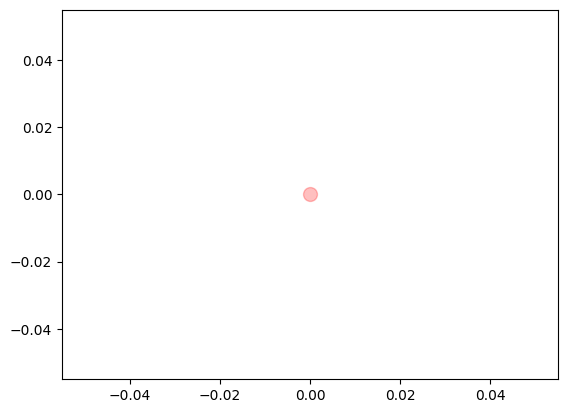

In [11]:
# plot the mean of the data
mean = X.mean(0)
plt.plot(mean[0], mean[1], 'o', markersize=10, color='red', alpha=0.25)

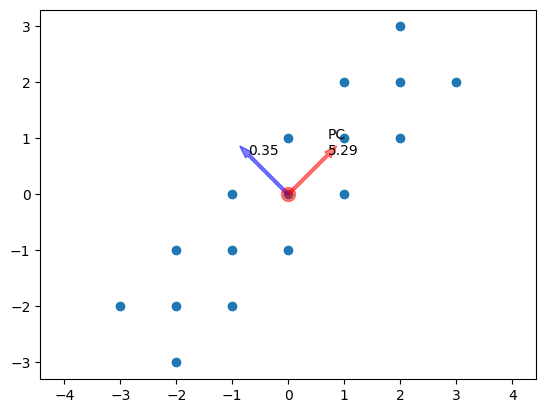

In [12]:
# plot summery

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

mean = X.mean(0)
plt.plot(mean[0], mean[1], 'o', markersize=10, color='red', alpha=0.5)

Sigma = get_covariance(X)
g, l = get_eigen(Sigma)

max_dim = np.argmax(l)

for i in range(l.shape[0]):
    variance = l[i][i]
    value = str(np.round(variance, 2))
    if i == max_dim:
        plt.arrow(mean[0], mean[1], g[0][i], g[1][i], width=0.05, color='red', alpha=0.5)
        plt.annotate(f'PC\n{value}' , [g[0][i], g[1][i]])
    else:
        plt.arrow(mean[0], mean[1], g[0][i], g[1][i], width=0.05, color='blue', alpha=0.5)
        plt.annotate(f'{value}', [g[0][i], g[1][i]])


## Singular Value Decomposition (SVD)

$$
\mathbf{M} = \mathbf{U} \cdot \mathbf{\Sigma} \cdot \mathbf{V}
$$

- $\mathbf{U}$: array[N, D]
    - Left Singular Matrix
- $\mathbf{\Sigma}$: array [D, D]
    - Singular Matrix
- $\mathbf{V}$: array[D, D]
    - Right Singular Matrix

## PCA and SVD
- Relationship
$$\lambda_i = \frac{s_i^2}{N}$$

In [13]:
# Given data
M = np.array([[1, 2], [6, 3], [0, 2]])

N, D = X.shape[0], X.shape[1]

print(f"shape: {M.shape}")
print(f"sample: {N}")
print(f"features: {D}")

for _, m in enumerate(M):
    print(f'    {m}')

shape: (3, 2)
sample: 17
features: 2
    [1 2]
    [6 3]
    [0 2]


Using numpy linalg library
- np.linalg.svd

In [14]:
u, s, v = np.linalg.svd(X)
print(u.shape)
print(s.shape)
print(type(s))
print(s)
print(v.shape)
print(v)

(17, 17)
(2,)
<class 'numpy.ndarray'>
[9.48683298 2.44948974]
(2, 2)
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


[0. 0.]
0


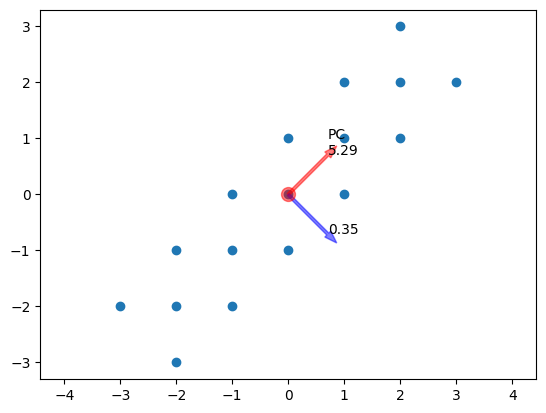

In [15]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

mean = X.mean(0)
print(mean)
plt.plot(mean[0], mean[1], 'o', markersize = 10, color='red', alpha=0.5)

max_dim = np.argmax(s)
print(max_dim)

for i in range(len(s)):
    variance = s[i]**2 / (N)
    value = str(np.round(variance, 2))
    if i == max_dim:
        plt.arrow(mean[0], mean[1], v[i][0], v[i][1], width=0.05, color='red', alpha=0.5)
        plt.annotate(f'PC\n{value}' , [v[i][0], v[i][1]])
    else:
        plt.arrow(mean[0], mean[1], v[i][0], v[i][1], width=0.05, color='blue', alpha=0.5)
        plt.annotate(f'{value}', [v[i][0], v[i][1]])


# Dimensionality reduction 2
## Matrix Factorization
    Non-linear dimensionality reduction

In [16]:
import time
import scipy.sparse as sp
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
%matplotlib inline

# Recommendation system
- Restaurant recommendation system
- Primary optimization problem
  - [Goal] minimize the reconstruction error
    - Matrix $\mathbf{R}$ completion task
  - Predict the ratings a user will give to a restaurant they have not yet rated based on a latent factor model
  - We are going to factorize the rating matrix by $\mathbf{Q}$ and $\mathbf{P}$ given $\mathbf{R}$
  - Given $\mathbf{R}$
    - $\mathbf{r_{ui}}$ : ratings to item i by user u
- Args
  - $\mathbf{R}$: array[N, D]
    - rating matrix, sparse
  - S={(u, i)|$r_{ui}$ != None} 
- Returns (optimum solution)
  - $\mathbf{Q}$: array[N, K]
    - $\mathbf{q}_u$ : Latent factor for user $u$
  - $\mathbf{P}$: array[K, D]
    - $\mathbf{p}_i$ : Latent factor for item $i$

- Objective function (minimization of reconstruction error)
  - including the regularization term
    - If R is too sparse to reconstruct, 
      - Regularization term becomes __Dominant__
        - push latent factors to the undetermined area (minimize the length)
    - Else,
      - Sum of Squared loss becomes __Dominant__

$$
\mathcal{L} = \min{P, Q}_{\sum{(u, i) \in S}} (R_{ui} - \mathbf{q}_u\mathbf{p}_i^T)^2 + \lambda [\sum_i{\left\lVert \mathbf{p}_i \right\rVert}^2 + \sum_u{\left\lVert \mathbf{q}_u \right\rVert}^2]
$$ 


## How to solve this minimization problem
- Problem to solve
  - We need to optimize __TWO VARIABLES__ {P and Q} at the same time
$$
\mathcal{L} = \min{P, Q}_{\sum{(u, i) \in S}} (R_{ui} - \mathbf{q}_u\mathbf{p}_i^T)^2 + \lambda [\sum_i{\left\lVert \mathbf{p}_i \right\rVert}^2 + \sum_u{\left\lVert \mathbf{q}_u \right\rVert}^2]
$$ 

### Methods
1. Alternating optimization
   - We assume that one of the free parameters is given
   - Optimize the two parameters in turns
2. Stochastic gradient descent (SGD)
   - Sample $\mathbf{r}_{ui}$ (mini-batch)
   - Optimize the parameters by approximating the loss of all data samples with sampled dataset.

## Load and Pre-process the Data

In [17]:
ratings = np.load("yelp-dataset.npy")

## given data interior
## [user_id, restaurant, ratings]
#   [[101968   1880      1]
#   [101968    284      5]
#   [101968   1378      2]
#   ...
#   [ 72452   2100      4]
#   [ 72452   2050      5]
#   [ 74861   3979      5]]

In [18]:
# shape of the rating matrix
# Given matrix is containing the ratings by each user

n_users, n_rests = np.max(ratings[:,0]), np.max(ratings[:, 1])
print(f'#users: {n_users + 1}')
print(f'#items (restaurants): {n_rests + 1}')
print(f'data type: {type(ratings)}')

#users: 337867
#items (restaurants): 5899
data type: <class 'numpy.ndarray'>


In [19]:
# We need to store this matrix as a sparse matrix to avoid out-of-memory issues
R = sp.coo_matrix((ratings[:, 2], (ratings[:, 0], ratings[:, 1])), shape = (n_users+1, n_rests+1)).tocsr()
# R interior
#  (User_id, restaurant), rating
#     (0, 2050)	        5
#     (1, 36)	        1
#     (1, 580)	        5
#     (1, 628)	        5
#     (1, 703)	        1
#     (1, 774)	        5
#     (1, 1303)	        4
#     (1, 2345)	        4
#     (1, 2809)	        5
#     (1, 3870)	        4
#     (1, 4193)	        5
#     (1, 5256)	        5
#     (1, 5344)	        4
#     (1, 5703)	        4
#     (1, 5890)	        5
#     (2, 3694)	        5

## Solution for the cold start problem
- Cold start problem
  - When a new user is coming into the recommendation system, we can not predict about his/her future rating because there is no history
- In preprocessing step
  - We recursively remove all users and restaurants with 10 or less ratings
  - Then, we randomly select 200 data points for the validation and tests sets, respectively
  - After this, we subtract the mean rating for each user to account for this global effects (standardize)


__NOTE__:
  Zero in R is the rating with 0 not the 'unknown' zeros in the matrix. We store the indices for which we are rating data available in a separate variable

In [20]:
def cold_start_preprocessing(matrix, min_entries):
    """
    Recursively removes rows and columns from the input matrix
    which have less ratings than min_entries

    Args:
        matrix: array[n_users, n_items]
            rating data matrix R
        min_entries: int
            minimum entries to be arrowed to exist in the matrix
    
    Returns:
        matrix: sp.spmatrix, shape[N', D']
        The pre-processed matrix -> where N' <= N, D' <= D
    """
    print("shape before: {}".format(matrix.shape))
    print("----------- V -----------")

    shape = (-1, -1)
    while matrix.shape != shape:
        shape = matrix.shape
        # Make stencil buffer (mask) masking more than 0 entries
        nnz = matrix > 0
        # Make stencil buffer masking the row which has less than minimum entries
        # .A1 returns flatten matrix
        row_ixs = nnz.sum(1).A1 > min_entries
        # Only leave out the rows having more than minimum entries
        matrix = matrix[row_ixs]

        # Make stencil buffer masking more than 0 entries
        nnz = matrix > 0
        # Make stencil buffer masking the column which has less than minimum entries
        # .A1 returns flatten matrix
        col_ixs = nnz.sum(0).A1 > min_entries
        # Only leave out the columns having more than minimum entries
        matrix = matrix[:, col_ixs]
    print("shape after: {}".format(matrix.shape))
    nnz = matrix > 0

    assert (nnz.sum(0).A1 > min_entries).all()
    assert (nnz.sum(1).A1 > min_entries).all()

    return matrix


In [21]:
cold_start_preprocessing(R, 10)

shape before: (337867, 5899)
----------- V -----------
shape after: (11275, 3531)


<11275x3531 sparse matrix of type '<class 'numpy.int64'>'
	with 285343 stored elements in Compressed Sparse Row format>

## Subtraction the mean user rating from the sparse rating matrix

In [22]:
dev_mat = cold_start_preprocessing(R, 10)

shape before: (337867, 5899)
----------- V -----------
shape after: (11275, 3531)


In [23]:
n_users, n_rests = dev_mat.shape
print(f'{n_users}, {n_rests}')

11275, 3531


In [24]:
# mean ratings over a user
row = dev_mat.getrow(0)
sum_ratings = row.sum()
num_nnz = row.count_nonzero()

print(f'num_nnz: {num_nnz}')
print(f'sum_ratings: {sum_ratings}')


mean_over_u = np.zeros(n_users)

for u in range(n_users):
    row = dev_mat.getrow(u)
    sum_ratings = row.sum()
    num_nnz = row.count_nonzero()
    mean_user = sum_ratings/num_nnz
    mean_over_u[u] = mean_user

print('mean ratings over a user')
print(mean_over_u)
print(f'shape: {mean_over_u.shape}\n')


# mean ratings over an item\
print('mean ratings over an item')
mean_over_i = dev_mat.mean(0)
print(mean_over_i)
print(f'shape: {mean_over_i.shape}\n')

num_nnz: 13
sum_ratings: 52
mean ratings over a user
[4.         4.4        3.72727273 ... 3.5        4.11764706 2.1       ]
shape: (11275,)

mean ratings over an item
[[0.01800443 0.00381375 0.04399113 ... 0.00629712 0.00700665 0.01649667]]
shape: (1, 3531)



In [25]:
# flatten the mean ratings over a user
f_mou = mean_over_u.flatten()
print(f_mou.shape)

(11275,)


In [26]:
# Standardization
std_mat = dev_mat - f_mou[:, None]
# mean ratings over a user should be close to zero
eps = 1e-10
print(std_mat.mean(1))
assert (std_mat.mean(1).A1 < eps).all()

[[-3.98527329]
 [-4.38130841]
 [-3.71566129]
 ...
 [-3.48810535]
 [-4.09782265]
 [-2.07621071]]


In [27]:
type(dev_mat)

scipy.sparse._csr.csr_matrix

## function 1: Centralization
    for subtraction the man rating per user from the non-zero elements in the input matrix

In [28]:
def centralization(matrix):
    """
    Subtract the mean rating per user from the non-zero elements

    Args:
    matrix: sp.spmatrix, shape [N, D]
            Input sparse matrix

    Retuns:
    matrix: sp.spmatrix, shape[N, D]
            centralized input matrix at 0 (the mean-shifted ones)
    user_means: np.array, shape[N, 1]
                The mean rating per user that can be used to recover the absolute ratings from the mean-shifted ones.
    """
    n_users, n_items = matrix.shape
    print(n_users)
    print(n_items)

    # Create mask of non_zero entries
    nnz_mask = matrix > 0

    # Take mean per user
    # uer_means: matrix [n_users, 1]
    user_means = matrix.sum(1) / nnz_mask.sum(1)
    print(type(user_means))
    print()
    print(user_means.shape)

    # cerate a compressed sparse row matrix(csr_matrix, same type with input matrix
    #  
    subtract_mask = sp.csr_matrix(user_means).multiply(nnz_mask)

    cent_mat = matrix - subtract_mask

#     assert np.all(np.isclose(matrix.mean(1), 0))
    return cent_mat, user_means

In [29]:
cent_mat, user_means = centralization(dev_mat)

11275
3531
<class 'numpy.matrix'>

(11275, 1)


## Split the data into a train, validation and test set

In [30]:
# create train, valid, and test dataset
# create dataloader

# Here we are using sparse matrix, then we need to sample train, valid, and test data samples randomly.

# Configuration
# The number of the valid and test samples

n_validation = 100
n_test = 100

# copy centralized matrix
matrix_cp = cent_mat.copy()
# obtain the index lists which are containing non-zero variable
non_zero_idx = np.argwhere(matrix_cp)

# sample indices randomly (user u, item i)
ixs = np.random.permutation(non_zero_idx)

# obtain u-index list and i-index list as tuple (u, i)
val_idx = tuple(ixs[:n_validation].T)
test_idx = tuple(ixs[n_validation:n_validation + n_test].T)

print(val_idx)
print(test_idx)

# obtain the array (flatten) 
val_values = matrix_cp[val_idx].A1
test_values = matrix_cp[test_idx].A1

# Eliminate valid and test samples and obtain train data.
matrix_cp[val_idx] = matrix_cp[test_idx] = 0
print(matrix_cp.shape)
matrix_cp.eliminate_zeros()


(array([10385,  3958,  7150,  9580,  3493, 10259,  3577, 10359,  6140,
        8635,  5145,  8025, 10858,  4579,  8149,  2923,  9666,  1009,
        6016,  9919,  5618,   725,  9210,  9055,  1580,  8467,  7148,
       10934,  7663,  7783,  9033,  6830,  3187,  1141,  1258,  9198,
        3677, 10827, 11243,  4787,  7959,  2523,  1751,  9235,  9624,
        5676,  4990,  1573, 10983,  9346,  5967,  8026,   578,  4251,
        5088,  5063,  4849,  6944,   889,   691,    20,   569,  8442,
        1504,  8760,  8093,  2455, 10100,  6478,  9963,  4508,  9245,
        5214, 10698,  7522,  4388,  6742,  6195,  9534,  6206,  3411,
        8800,  6671,  9401,  5549,  2163,  6971,   135,  2712,  3066,
        2790,  7581,  4579,   788,   326,  7373,  7708,  2737,  2793,
        6945], dtype=int32), array([2024, 3082, 1408, 2786,   13, 3165, 1767,  146,  246, 3200,  267,
       3355, 1500, 1191,  504,  629, 3504, 1576, 2134, 3317,  534, 2402,
        380,  660, 1321, 1605, 2967,  539, 2586, 2099,

In [31]:
for t, train in enumerate(matrix_cp):
    if t > 0:
        break
    print('train sample')
    print(train)
    print('valid sample')
    print(f'({val_idx[0][t]}, {val_idx[1][t]}):{val_values[t]}')
    print('test sample')
    print(f'({test_idx[0][t]}, {test_idx[1][t]}):{test_values[t]}')

train sample
  (0, 3526)	1.0
  (0, 3120)	1.0
  (0, 2508)	1.0
  (0, 1694)	1.0
  (0, 461)	1.0
  (0, 416)	-3.0
  (0, 368)	1.0
  (0, 22)	-3.0
valid sample
(10385, 2024):-0.6119402985074629
test sample
(8915, 1500):0.48888888888888893


### Function 2: split the centralized data into train, valid, and test

In [32]:
def split_data(matrix, n_val, n_test):
    """
    Extract validation and test entries from the input matrix

    Args:
        matrix: sp.spmatrix, shape [N, D]
                The input data matrix
        n_val:  int
                The number of validation entries to extract
        n_test: int
                The number fo test entries to extract
        
    Returns:
        matrix_split:   sp.spmatrix, shape [N, D]
                        a copy of the input matrix in which the validation and 

        val_idx:        tuple, shape [2, n_val]
                        The indices of the validation entries

        test_idx:       tuple, shape [2, n_test]
                        The indices of the test entries

        val_values:     np.array, shape [n_val]
                        The values of the input matrix at the validation indices

        test_values:    np.array, shape [n_train]
                        The values of the input matrix at the test indices
    """

    # copy the input matrix
    matrix_cp = matrix.copy()

    # obtain indices pair (User u, Item i)
    non_zero_idx = np.argwhere(matrix_cp)

    # random permutation of the list of indices pair
    ixs = np.random.permutation(non_zero_idx)

    # obtain a tuple [n_val, 2] for u and i, respectively
    val_idx =tuple(ixs[:n_val].T)
    test_idx = tuple(ixs[n_val:n_val + n_test].T)

    # obtain the ratings for the validation data
    val_values = matrix_cp[val_idx].A1

    # obtain the ratings for the test data
    test_values = matrix_cp[test_idx].A1

    # Set zero to entries which are assigned as valid or test data
    matrix_cp[val_idx] = matrix_cp[test_idx] = 0

    # Eliminate zero entries
    matrix_cp.eliminate_zeros()

    return matrix_cp, val_idx, test_idx, val_values, test_values

In [33]:
dev_mat = cold_start_preprocessing(R, 20)

shape before: (337867, 5899)
----------- V -----------
shape after: (3529, 2072)


In [34]:
n_val = 200
n_test = 200
# split data
R_train, val_idx, test_idx, val_values, test_values = split_data(dev_mat, n_val, n_test)

In [35]:
# Centralization
non_zero_indices = np.argwhere(R_train)
R_shifted, user_means = centralization(R_train)

# Apply the same shift to the validation and test data
val_values_shifted = val_values - np.ravel(user_means[np.array(val_idx).T[:, 0]])
test_values_shifted = test_values - np.ravel(user_means[np.array(test_idx).T[:, 0]])

3529
2072
<class 'numpy.matrix'>

(3529, 1)


In [36]:
def loss(values, ixs, Q, P, reg_lambda):
    """
    Compute the loss of the latent factor model (at indices ixs)

    Args:
        values (list of R_ui): np.array, shape[n_ixs, ]
                The array with the ground-truth values
        ixs (list of ui itself):    tuple, shape[2, n_ixs]
                The indices at which we want to evaluate the loss(usually the nonzero indices of the unshifted data matrix)
        Q:  np.array, shape [N. k]
            The matrix Q of a latent factor model
        P:  np.array, shape [k, D]
            The matrix P of a latent factor model
        reg_lambda: float
            The regulation strength
    
    Returns:
        loss:   float
                The loss of the latent factor model
    """

    # mean of sum of squared error
    sse_loss = np.sum((values - Q.dot(P)[ixs])**2)
    # regularization term 
    regularization_loss = reg_lambda * (np.sum(np.linalg.norm(P, axis = 0)**2) + np.sum(np.linalg.norm(Q, axis = 0)**2))

    return sse_loss + regularization_loss

## Initialization of the Q and P for optimization

In [37]:
print(R_train.shape)
N, D = R_train.shape
k = D
Q = np.random.rand(N, k)
print(type(Q))
print(Q.shape)
P = np.random.rand(k, D)
print(type(P))
print(P.shape)

(3529, 2072)
<class 'numpy.ndarray'>
(3529, 2072)
<class 'numpy.ndarray'>
(2072, 2072)


In [38]:
f_R_train = R_train.astype(float)
print(f_R_train.shape)
print(type(f_R_train))
print(f_R_train)
print(k)

(3529, 2072)
<class 'scipy.sparse._csr.csr_matrix'>
  (0, 3)	5.0
  (0, 24)	3.0
  (0, 219)	4.0
  (0, 333)	2.0
  (0, 344)	3.0
  (0, 393)	5.0
  (0, 470)	4.0
  (0, 530)	5.0
  (0, 570)	3.0
  (0, 585)	3.0
  (0, 657)	4.0
  (0, 664)	4.0
  (0, 711)	5.0
  (0, 799)	4.0
  (0, 825)	3.0
  (0, 872)	4.0
  (0, 1069)	4.0
  (0, 1120)	5.0
  (0, 1188)	5.0
  (0, 1323)	4.0
  (0, 1627)	2.0
  (0, 1648)	4.0
  (0, 1768)	4.0
  (0, 1865)	4.0
  (0, 1946)	2.0
  :	:
  (3528, 735)	2.0
  (3528, 795)	1.0
  (3528, 818)	1.0
  (3528, 839)	4.0
  (3528, 899)	4.0
  (3528, 936)	1.0
  (3528, 1001)	2.0
  (3528, 1005)	1.0
  (3528, 1070)	4.0
  (3528, 1130)	2.0
  (3528, 1144)	2.0
  (3528, 1170)	2.0
  (3528, 1175)	2.0
  (3528, 1215)	2.0
  (3528, 1252)	2.0
  (3528, 1332)	3.0
  (3528, 1363)	1.0
  (3528, 1395)	3.0
  (3528, 1682)	3.0
  (3528, 1685)	4.0
  (3528, 1689)	2.0
  (3528, 1798)	1.0
  (3528, 1945)	5.0
  (3528, 1954)	4.0
  (3528, 1998)	1.0
2072


In [39]:
# When we use svds function from the scipy.sparse.linalg, we need to set k as following
# `k` must be an integer satisfying `0 < k < min(A.shape)`.
U, s, V = svds(f_R_train, k=100)
S = np.diag(s)
Q = U.dot(S)
P = V

In [40]:
print(U.shape)
print(s.shape)
print(V.shape)

(3529, 100)
(100,)
(100, 2072)


In [41]:
S = np.diag(s)
Q = U.dot(S)
print(Q.shape)
P = V
print(P.shape)

(3529, 100)
(100, 2072)


In [42]:
R_train.dtype

dtype('int64')

### Function that initialize the latent factors Q and P


In [43]:
def initialize_Q_P(matrix, k, init = 'random'):
    """
    Initialize the matrices Q and P for a latent factor model
    Initialize them by using SVD or random

    Args:
        matrix: sp.spmatrix, shape [N, D]
                The matrix to be factorized
        k:      int
                The number of latent dimension
        init:   str in ['svd', 'random'], default:'random'
                The initialization strategy. 'svd' means that we use SVD to initialize P and Q
                'random' means we initialize the entries in P and Q randomly in the interval [0. 1)
                -> numpy.random.rand(shape)
    Returns:
        Q:  np.print(U.shape)
            The initialized matrix Q of a latent factor model
        P:  np.array, shape[k, D]
            The initialized matrix P of a latent factor model
    """ 

    N, D = matrix.shape

    np.random.seed(0)

    if matrix.dtype != float:
        matrix = matrix.astype(float)

    if init=='random':
        Q = np.random.random((N, k))
        P = np.random.random((k, D))
    elif init=='svd':
        U, s, V = svds(matrix, k=k)
        S = np.diag(s)
        Q = U.dot(S)
        P = V
    else:
        raise ValueError
    
    assert Q.shape == (N, k)
    assert P.shape == (k, D)
    return Q, P

In [44]:
Q, P = initialize_Q_P(R_train, k = 100, init='svd')

In [45]:
print(f'{Q.shape}')
print(f'{P.shape}')

(3529, 100)
(100, 2072)


## Optimization
- Alternating optimization
    - We need to optimize Q and P simultaneously in the primary optimization problem
    - But this is really difficult to implement
    - We are going to pretend knowing either Q or P at a moment and optimize the other variable


In [46]:
row  = np.array([0, 0, 1, 3])
col  = np.array([0, 2, 1, 3])
data = np.array([1, 1, 1, 1])

A = sp.coo_matrix((data, (row, col)), shape=(4, 4)).tocsr()
print(A.toarray())
print(A)
list_rows = A.tolil().rows
print('=list=')
print(list_rows)

print('---------------------------')

A = A.tocsc()
print(A.toarray())
print(A)
list_colums = A.tolil().rows
print('=list=')
print(list_colums)



[[1 0 1 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 1]]
  (0, 0)	1
  (0, 2)	1
  (1, 1)	1
  (3, 3)	1
=list=
[list([0, 2]) list([1]) list([]) list([3])]
---------------------------
[[1 0 1 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 1]]
  (0, 0)	1
  (1, 1)	1
  (0, 2)	1
  (3, 3)	1
=list=
[list([0, 2]) list([1]) list([]) list([3])]


## Scipy sparse 
    csc vs csr
- CSC: Compressed sparse column
  - Sorted in the column indices 
- CSR: Compressed sparse row
  - Sorted in the row indices 
They are used for write-once-read-many-tasks


# Original data matrix

In [47]:
"""
R:   scipy.sparse._csr.csr_matrix, shape[337867, 5899]
"""
print(R)
print(type(R))
print(R.shape)

  (0, 2050)	5
  (1, 36)	1
  (1, 580)	5
  (1, 628)	5
  (1, 703)	1
  (1, 774)	5
  (1, 1303)	4
  (1, 2345)	4
  (1, 2809)	5
  (1, 3870)	4
  (1, 4193)	5
  (1, 5256)	5
  (1, 5344)	4
  (1, 5703)	4
  (1, 5890)	5
  (2, 3694)	5
  (3, 774)	1
  (3, 1291)	1
  (3, 2221)	4
  (4, 2894)	5
  (5, 1446)	4
  (5, 1648)	4
  (5, 1777)	3
  (5, 2008)	5
  (5, 2067)	4
  :	:
  (337859, 3443)	2
  (337859, 3567)	2
  (337859, 3802)	3
  (337859, 3898)	1
  (337859, 3971)	3
  (337859, 4794)	3
  (337859, 4800)	4
  (337859, 4816)	2
  (337859, 5198)	1
  (337859, 5579)	5
  (337859, 5601)	4
  (337859, 5700)	1
  (337860, 4943)	5
  (337861, 5675)	5
  (337862, 493)	3
  (337862, 1281)	5
  (337862, 2814)	4
  (337863, 1026)	4
  (337863, 2127)	5
  (337863, 2416)	4
  (337864, 5165)	2
  (337865, 1238)	5
  (337866, 251)	5
  (337866, 2932)	4
  (337866, 3779)	4
<class 'scipy.sparse._csr.csr_matrix'>
(337867, 5899)


# Pre-processed matrix
- Avoid cold start
- Prune rows and columns which have less than min_entries 

In [48]:
"""
R_prune:    scipy.sparse._csr.csr_matrix, shape [3529, 2072]
"""
min_entries = 20
R_prune = cold_start_preprocessing(R, min_entries)
print(type(R_prune))
print(R_prune.shape)

shape before: (337867, 5899)
----------- V -----------
shape after: (3529, 2072)
<class 'scipy.sparse._csr.csr_matrix'>
(3529, 2072)


# Centralized matrix
- Shifted matrix by corresponding mean over ratings (i) by a user (u)

In [49]:
"""
cent_R: scipy.sparse._csr.csr_matrix, shape [337867, 5899]
user_means: numpy.matrix, shape [337867, 1]
"""
cent_R, user_means = centralization(R)
print(type(cent_R))
print(cent_R.shape)
print(type(user_means))
print(user_means.shape)

337867
5899
<class 'numpy.matrix'>

(337867, 1)
<class 'scipy.sparse._csr.csr_matrix'>
(337867, 5899)
<class 'numpy.matrix'>
(337867, 1)


In [50]:
def info(matrix):
    return type(matrix), matrix.shape

# Split data into train, valid, and test set
- We can not split the matrix after centralization
- This is because, in the split function
  - Replace assigned ratings to valid and test in the training matrix with 0
  - If the train_matrix had already been centralized, you replace ratings with respective user's average (mean)
  - We should split the data first following centralization

In [51]:

n_val = 200
n_test = 200
# get shape of R_prune
n_users, n_items = R_prune.shape

In [52]:
# split pruned matrix into train, valid, and test
train_matrix, val_idx, test_idx, val_values, test_values = split_data(R_prune, n_val, n_test)

In [53]:
# centralize only train_matrix by each user rating means
# assigned ratings to valid and test are already replaced with 0 
train_R, user_means = centralization(train_matrix)
print(info(train_R))

3529
2072
<class 'numpy.matrix'>

(3529, 1)
(<class 'scipy.sparse._csr.csr_matrix'>, (3529, 2072))


In [54]:
# val_idx is tuple, shape [n_val, 2]
# [n_val, 0]: index of the corresponding user_index u
# [n_val, 1]: index of the corresponding item_index i

# convert val_idx(tuple) to array
# get the list of index of user_index u
_a = np.array(val_idx).T[:, 0]
# print(_a)
# obtain the corresponding user_means with list of indices
# convert the matrix to the 1D array by using np.ravel
a = np.ravel(user_means[_a])
# print(type(a))

In [55]:
# centralize val data set.
# In this case, val_values is np.ndarray
# We need to use 1D array of corresponding user means, subtract from the val_values
# create matrix from the values and index

val_values = val_values - np.ravel(user_means[np.array(val_idx).T[:,0]])
val_R = sp.coo_matrix((val_values, (val_idx[0], val_idx[1])), shape=(n_users, n_items)).tocsr()
print(info(val_R))

(<class 'scipy.sparse._csr.csr_matrix'>, (3529, 2072))


In [56]:
# centralize test data set.
# In this case, val_values is np.ndarray
# We need to use 1D array of corresponding user means, subtract from the test_values
# create matrix from the values and index

test_values = test_values - np.ravel(user_means[np.array(test_idx).T[:,0]])
test_R = sp.coo_matrix((test_values, (test_idx[0], test_idx[1])), shape=(n_users, n_items)).tocsr()
print(info(test_R))

(<class 'scipy.sparse._csr.csr_matrix'>, (3529, 2072))


In [57]:
"""
train_R:    scipy.sparse._csr.csr_matrix, shape (337867, 5899)
            Set valid and test entries to zero, only leave out train entries

val_idx:    tuple, shape [n_val, 2]
            u_index_list
            i_index_list

val_values: numpy.array, shape [n_val, ]
            corresponding values to the indices in val_idx

test_idx:   tuple, shape [n_test, 2]
            corresponding values to the indices in test_idx


val_R:      scipy.sparse._csr.csr_matrix, shape (337867, 5899)
            selected data as validation set are having values, others are set to zero

test_R:     scipy.sparse._csr.csr_matrix, shape (337867, 5899)
            selected data as test set are having values, others are set to zero

"""
n_val = 200
n_test = 200
n_users, n_items = cent_R.shape
train_matrix, val_idx, test_idx, val_values, test_values = split_data(R_prune, n_val, n_test)
train_R, user_means = centralization(train_matrix)
print(info(train_R))
val_values = val_values - np.ravel(user_means[np.array(val_idx).T[:,0]])
val_R = sp.coo_matrix((val_values, (val_idx[0], val_idx[1])), shape=(n_users, n_items)).tocsr()
print(info(val_R))
test_values = test_values - np.ravel(user_means[np.array(test_idx).T[:,0]])
test_R = sp.coo_matrix((test_values, (test_idx[0], test_idx[1])), shape=(n_users, n_items)).tocsr()
print(info(test_R))

3529
2072
<class 'numpy.matrix'>

(3529, 1)
(<class 'scipy.sparse._csr.csr_matrix'>, (3529, 2072))
(<class 'scipy.sparse._csr.csr_matrix'>, (337867, 5899))
(<class 'scipy.sparse._csr.csr_matrix'>, (337867, 5899))


# Initialization of Q and P

In [58]:
# option1 : random initialization
k = 100
np.random.seed(0)
Q = np.random.rand(n_users, k)
P = np.random.rand(k, n_items)

# option2 : initialize with SVD
U, s, V = svds(train_R, k=k)
S = np.diag(s)
Q = U.dot(S)
P = V
print(Q.shape)
print(P.shape)

(3529, 100)
(100, 2072)


# Compute loss
$$
\mathcal{L} = \min_{P, Q} {\sum_{(u, i) \in S}} (R_{ui} - \mathbf{q}_u\mathbf{p}_i^T)^2 + \lambda [\sum_i{\left\lVert \mathbf{p}_i \right\rVert}^2 + \sum_u{\left\lVert \mathbf{q}_u \right\rVert}^2]
$$ 


In [59]:
# sum of squared error (Ridge loss, using L2 loss)
# We must obtain nnz_index from not-centralized matrix if we are using np.argwhere
# otherwise, we will get rid of zero value as rating 0 but they were actually equal to user-mean.
nnz_index = np.argwhere(train_matrix)
train_idx = tuple(nnz_index.T)
train_values = train_R[train_idx].A1
sse_loss = np.sum((train_values-Q.dot(P)[train_idx])**2)
redge_lambda = 1e-4
regulalization_loss = redge_lambda * (np.sum(np.linalg.norm(P, axis = 0)**2) + np.sum(np.linalg.norm(Q, axis = 1)**2))

# Optimization (Learning)

In [60]:
print(type(nnz_index))
print(nnz_index[:, 0], nnz_index[:, 1])

<class 'numpy.ndarray'>
[   0    0    0 ... 3528 3528 3528] [   3   24  219 ... 1945 1954 1998]


### Create stencil buffer masking index pairs having non-zero value in original matrix

In [61]:
# create the stencil buffer such that mask index pair which are having argue in original matrix
# ones compressed sparse rows matrix such that only non-zero indices have 1.
nnz_mask = sp.coo_matrix((np.ones(len(nnz_index)), (nnz_index[:, 0], nnz_index[:, 1])), shape=R.shape, dtype = 'uint8').tocsr()

print(nnz_mask.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Create version of mask sorted in columns (compressed sparse column)

In [62]:
nnz_mask_col = nnz_mask.tocsc()
print(nnz_mask_col.tocsr()[0] == nnz_mask[0])

  (0, 0)	True
  (0, 1)	True
  (0, 2)	True
  (0, 3)	True
  (0, 4)	True
  (0, 5)	True
  (0, 6)	True
  (0, 7)	True
  (0, 8)	True
  (0, 9)	True
  (0, 10)	True
  (0, 11)	True
  (0, 12)	True
  (0, 13)	True
  (0, 14)	True
  (0, 15)	True
  (0, 16)	True
  (0, 17)	True
  (0, 18)	True
  (0, 19)	True
  (0, 20)	True
  (0, 21)	True
  (0, 22)	True
  (0, 23)	True
  (0, 24)	True
  :	:
  (0, 5874)	True
  (0, 5875)	True
  (0, 5876)	True
  (0, 5877)	True
  (0, 5878)	True
  (0, 5879)	True
  (0, 5880)	True
  (0, 5881)	True
  (0, 5882)	True
  (0, 5883)	True
  (0, 5884)	True
  (0, 5885)	True
  (0, 5886)	True
  (0, 5887)	True
  (0, 5888)	True
  (0, 5889)	True
  (0, 5890)	True
  (0, 5891)	True
  (0, 5892)	True
  (0, 5893)	True
  (0, 5894)	True
  (0, 5895)	True
  (0, 5896)	True
  (0, 5897)	True
  (0, 5898)	True


/home/ryotok/anaconda3/envs/dlml/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3369: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Create lists of column and row 

In [63]:
# cols: numpy.ndarray

n_row, n_col = train_R.shape

cols = nnz_mask.T.tolil().rows
print(type(cols))
print(cols)

rows = nnz_mask.tolil().rows
print(type(rows))

<class 'numpy.ndarray'>
[list([78, 126, 436, 607, 684, 693, 710, 1078, 1102, 1134, 1303, 1445, 1451, 1656, 1721, 1979, 2085, 2165, 2316, 2378, 2420, 2530, 2545, 2800, 2961, 3072, 3134, 3198, 3366, 3394, 3397, 3496, 3497])
 list([141, 177, 191, 192, 214, 235, 266, 300, 359, 362, 412, 508, 515, 601, 606, 623, 630, 642, 743, 801, 855, 871, 884, 905, 1158, 1176, 1196, 1259, 1505, 1609, 1667, 1679, 1699, 1751, 1752, 1857, 1901, 1909, 1936, 2016, 2055, 2089, 2103, 2150, 2165, 2217, 2237, 2329, 2380, 2388, 2408, 2420, 2445, 2457, 2524, 2598, 2603, 2607, 2682, 2714, 2750, 2772, 2798, 2898, 2919, 2920, 2946, 3057, 3130, 3137, 3240, 3298, 3314, 3320, 3353, 3358, 3397, 3404, 3522])
 list([25, 54, 55, 136, 147, 226, 298, 325, 368, 418, 453, 506, 534, 551, 574, 590, 622, 680, 723, 740, 741, 767, 784, 795, 868, 962, 964, 967, 1023, 1133, 1136, 1153, 1164, 1190, 1234, 1236, 1278, 1352, 1354, 1355, 1356, 1361, 1473, 1563, 1612, 1628, 1633, 1669, 1692, 1785, 1807, 1824, 1861, 1920, 1950, 2043, 2068, 21

### Create module for ridge regression loss

In [64]:
reg_lambda = 1e-4
# Fit intercept = False means that setting y_intercept to 0.
# This should be False if we already centralize the data in advance 

reg = Ridge(alpha = reg_lambda, fit_intercept=False)

### Initializing Q and P

In [65]:
init = 'svd'
Q, P = initialize_Q_P(train_R, k = 100, init = init)

### Optimization procedure

In [66]:
max_steps = 10
eval_every = 1
patience = 5
optimizer = 'alt'
lr = 1e-2
reg_lambda = 1
converged_after = -1

In [67]:
train_losses = []
valid_losses = []

best_val_loss = best_Q = best_P = converged_after = -1

bef = -1 # average time to execute one iteration
times = [] # time stamp lists

In [68]:
for i in range(4):
    print(i)

0
1
2
3


In [69]:
for user_idx in range(train_R.shape[0]):
    _rating_idx = rows[user_idx]
    if len(_rating_idx) == 0:
        print(len(_rating_idx))

In [70]:
for it in range(max_steps):
    # If it is not the first iteration,
    if bef != -1:
        times.append(time.time()-bef)
    bef = time.time()

    
    # Evaluation
    # Matrix factorization model evaluation
    # only execute every 'eval_every',
    if it % eval_every == 0:
        # evaluate model on train_R
        # calculate train loss
        train_loss = loss(train_R[train_idx].A1, train_idx, Q, P, reg_lambda)
        train_losses.append(train_loss)

        # evaluate model on val_R
        # calculate val loss
        val_loss = loss(val_R[val_idx].A1, val_idx, Q, P, reg_lambda)
        valid_losses.append(val_loss)

        # update the Q and P and the minimum loss so far
        if best_val_loss < 0 or val_loss < best_val_loss:
            best_val_loss = val_loss
            best_Q = Q
            best_P = P
            # where there is improvement, let 'patience' remain original number
            current_patience = patience
        else:
            # where there is no improvement, decrement the counter of patience
            current_patience -= 1
        
        # if there are no improvement in 'patience', we stop this evaluation
        if current_patience == 0:
            # report the number of iteration (steps) 
            converged_after = it - patience * eval_every
            break
    print("Iteration {}, train_loss: {:.3f}, validation_loss {:.3f}".format(it, train_loss, val_loss))
    # Learning
    # Optimization step

    # stochastic gradient descent
    if optimizer == 'sgd':
        # random sample index of indices pair (u, i) from the tuple of non-zero value indices of train_R
        sgd_indices = np.arange(len(train_idx[0]))
        # shuffle the indices
        np.random.shuffle(sgd_indices)

        for idx in sgd_indices:
            # obtain u and i pair from the tuple by using random sampled index of them
            u, i = train_idx[0][idx], train_idx[1][idx]
            # predict the value of R_ui by using factorized matrix Q and P
            prediction = Q[u, :].dot(P[:, i])
            # calculate error of prediction
            # this e is a helper to get the gradients
            e = (R[u, i]-prediction)

            # Update latent factors
            Q[u, :] += lr * (e * P[:, i] - reg_lambda * Q[u, :])
            P[:, i] += lr * (e * Q[u, :] - reg_lambda * P[:, i])
    
    # alternating optimization
    elif optimizer == 'alt':
        # fix Q and update P
        for rating_idx in range(train_R.shape[1]):
            # Obtain user u lists in rating_idx which are having non-zero value 
            # e.g nnz_index = [179783, 195038, 234835, 282041, 303144, 321814]
            # and [179783, rating_idx], [195038, rating_idx],....
            _user_idx = cols[rating_idx]
            # X   -> Q[_user_idx]
            # W.T -> P[_user_idx] (weights) ==> .coef__
            # y   -> np.squeeze(train_R[_user_idx, rating_idx])
            res = reg.fit(Q[_user_idx], np.squeeze(train_R[_user_idx, rating_idx].toarray()))
            P[:, rating_idx] = res.coef_
        
        # fix P and update Q
        for user_idx in range(train_R.shape[0]):
            # Obtain item i lists in user_idx which are having non-zero value
            # e,g, [100. 200, ,,, 300]
            # e.g, [user_idx, 100], [user_idx, 200], ...
            _rating_idx = rows[user_idx]
            # X  -> P[:, _rating_idx].T
            # W  -> Q[user_idx]
            # Y  -> np.squeeze(train_R[user_idx, _rating_idx])
            res = reg.fit(P[:, _rating_idx].T, np.squeeze(train_R[user_idx, _rating_idx].toarray()))
            Q[user_idx, :] = res.coef_

if max_steps - 1 != it:
    print("Converged after {} iterations, on average {:.3f}s per iteration".format(converged_after, np.mean(times)))
else:
    print("{} iterations, not converged, on average {:.3f}s per iteration".format(it, np.mean(times)))


Iteration 0, train_loss: 150018.293, validation_loss 43252.095
Iteration 1, train_loss: 124524.421, validation_loss 127707.732
Iteration 2, train_loss: 98155.727, validation_loss 99579.143
Iteration 3, train_loss: 93081.593, validation_loss 94355.281
Iteration 4, train_loss: 90200.576, validation_loss 91279.658
Converged after 0 iterations, on average 7.222s per iteration


In [71]:
def latent_factor_alternating_optimization(R, non_zero_idx, k, val_idx, val_values, reg_lambda, max_steps = 100, init = 'random', log_every = 1, patience = 5, eval_every = 1, optimizer = 'sgd', lr = 1e-2):
    """
    Perform matrix factorization using alternating optimization. 
    Training is done via patience.
    i.e. we stop training after we observe no improvement 
    on the validation loss for a certain
    amount of training steps. We then return the best values 
    for Q and P observed during training.
    
    Args:
        R:              sp.spmatrix, shape [N, D]
                        The input matrix to be factorized (train_matrix)
                        It has to be centralized by mean.
        
        non_zero_idx:   np.array, shape [nnz, 2]
                        The indices of the non-zero entries of the **un-shifted** matrix to be factorized.
                        nnz refers to the number of non-zero entries. Note that this may be different 
                        from the number of non-zero entries in the input matrix(training matrix) since this indices refers
                        original data matrix
        
        k:              int
                        The latent factor dimension
        
        val_idx:        tuple, shape[2, n_val]
                        [u1, u2, ,,,,, u_n_val]
                        [i1, i2, ,,,,, i_n_val]
                        Tuple pf the validation set indices
                        n_val refers to the size of the validation set
        
        val_values:     np.array, shape [n_val, ]
                        The values in the validation set

        reg_lambda:     float
                        The regularization strength
        
        max_steps:      int, optional, default = 100
                        Maximum number of training interactions (steps, 1 steps, one optimization of two matrix factor Q and P),
                        Note that we will step early if we observe
                        no improvement on the validation with the step to be patient

        init:           str in ['random', 'svd'], default 'random'
                        The initialization strategy for P and Q.
        
        log_every:      int, optional, default: 1
                        Log the training status every X iterations
        
        patience:       int, optional, default: 5
                        Stop training after we observe no improvement of the valid loss for X evaluation
                        iterations. After we stop training, we restore the best observed values for Q and P

        eval_every:     int, optional, default: 1
                        Evaluate the training and validation loss every x steps
                        If we observe no improvement of the validation error, we decrease out patience by 1, else we reset it to *patience*
        
        optimizer:      str in ['sgd', 'alt'], optional, default: 'sgd'
                        If 'sgd; stochastic gradient descent shall be used, otherwise, use alternating least squares.
        
    Returns:

        best_Q:             np.array, shape [N, k]
                            Best value for Q (based on the validation loss) observed during training
        
        best_P:             np.array, shape[k, D]
                            Best value for P (based on validation loss) observed during training

        validation_losses:  list of floats
                            Validation loss for every evaluation iteration, can be used for plotting the validation loss
                            over time
        
        train_losses:       list of floats
                            Training loss for every evaluation iteration, can be used for plotting the training loss over time

        converged_after:    int
                            it - patience * eval_every, where it is the iteration in which patience hits 0,
                            or -1 if we hit max_steps before converging.

    """

    nnz_mask = sp.coo_matrix((np.ones(len(non_zero_idx)), (non_zero_idx[:, 0], non_zero_idx[:, 1])), shape=R.shape, dtype = "uint8").tocsr()

    nnz_mask_col = nnz_mask.tocsc()

    cols = nnz_mask.T.tolil().rows
    rows = nnz_mask.tolil().rows

    reg  = Ridge(alpha=reg_lambda, fit_intercept = False)

    Q, P = initialize_Q_P(R, k, init)
    train_losses = []
    validation_losses = []

    best_val_loss = best_Q = best_P = converged_after = -1

    train_idx = tuple(non_zero_idx.T)

    bef = -1
    times = []
    for it in range(max_steps):
        if bef != -1:
            times.append(time.time()-bef)
        bef = time.time()

        if it % eval_every ==0:
            train_loss = loss(R[train_idx].A1, train_idx, Q, P, reg_lambda)
            train_losses.append(train_loss)

            val_loss = loss(val_values, val_idx, Q, P, reg_lambda)
            validation_losses.append(val_loss)

            if best_val_loss < 0 or val_loss < best_val_loss:
                best_val_loss = val_loss
                best_Q = Q
                best_P = P
                current_patience = patience
            else:
                current_patience -=1

            if current_patience ==0:
                converged_after = it - patience * eval_every
                break

        print("Iteration {}, training loss: {:.3f}, validation loss: {:.3f}".format(it, train_loss, val_loss))

        if optimizer == 'sgd':
            sgd_indices = np.arange(len(train_idx[0]))
            np.random.shuffle(sgd_indices)

            for idx in sgd_indices:
                u, i = train_idx[0][idx], train_idx[1][idx]
                prediction=Q[u, :].dot(P[:, i])
                e = (R[u, i] - prediction) # error

                # Update latent factors
                Q[u, :] += lr * (e * P[:, i]-reg_lambda * Q[u, :])
                P[:, i] += lr * (e * Q[u, :]-reg_lambda * P[:, i])

        elif optimizer == 'als':
            # fix Q and update P
            for rating_idx in range(R.shape[1]):
                nnz_idx = cols[rating_idx]
                res = reg.fit(Q[nnz_idx], np.squeeze(R[nnz_idx, rating_idx].toarray()))
                P[:, rating_idx] = res.coef_

            for user_idx in range(R.shape[0]):
                 nnz_idx = rows[user_idx]
                 res = reg.fit(P[:, nnz_idx].T, np.squeeze(R[user_idx, nnz_idx].toarray()))
                 Q[user_idx, :] = res.coef_
            
    print("Converged after {} iteration, ob average {:.3f}s per iteration".format(converged_after, np.mean(times)))
    return best_Q, best_P, validation_losses, train_losses, converged_after

In [72]:
Q_sgd, P_sgd, val_loss_sgd, train_loss_sgd, converged_sgd = latent_factor_alternating_optimization(
    R_shifted, nnz_index, k=100, val_idx=val_idx, val_values=val_values, 
    reg_lambda=1e-4, init='random', max_steps=100, patience=10, optimizer='sgd', lr=1e-2
)

Iteration 0, training loss: 96807256.162, validation loss: 124961.399
Iteration 1, training loss: 287022.654, validation loss: 480.892
Iteration 2, training loss: 164496.167, validation loss: 418.935
Iteration 3, training loss: 113585.844, validation loss: 397.397
Iteration 4, training loss: 84521.368, validation loss: 403.360
Iteration 5, training loss: 65239.990, validation loss: 394.560
Iteration 6, training loss: 51620.946, validation loss: 408.072
Iteration 7, training loss: 41831.410, validation loss: 410.098
Iteration 8, training loss: 34279.319, validation loss: 420.662
Iteration 9, training loss: 28541.024, validation loss: 423.760
Iteration 10, training loss: 23992.504, validation loss: 436.397
Iteration 11, training loss: 20170.751, validation loss: 439.983
Iteration 12, training loss: 17228.444, validation loss: 441.693
Iteration 13, training loss: 14853.430, validation loss: 448.264
Iteration 14, training loss: 12818.962, validation loss: 455.994
Converged after 5 iteratio

In [73]:
Q_als, P_als, val_loss_als, train_loss_als, converged_als = latent_factor_alternating_optimization(
    R_shifted, nnz_index, k=100, val_idx=val_idx, val_values=val_values, 
    reg_lambda=1e-4, init='random', max_steps=100, patience=10, optimizer='als'
)

Iteration 0, training loss: 96807256.162, validation loss: 124961.399
Iteration 1, training loss: 2203.621, validation loss: 1569.629
Iteration 2, training loss: 506.646, validation loss: 1634.326
Iteration 3, training loss: 193.021, validation loss: 1416.058
Iteration 4, training loss: 93.799, validation loss: 1046.558
Iteration 5, training loss: 52.911, validation loss: 950.265
Iteration 6, training loss: 33.317, validation loss: 1001.383
Iteration 7, training loss: 22.996, validation loss: 982.183
Iteration 8, training loss: 17.187, validation loss: 956.423
Iteration 9, training loss: 13.749, validation loss: 948.659
Iteration 10, training loss: 11.633, validation loss: 937.438
Iteration 11, training loss: 10.294, validation loss: 926.332
Iteration 12, training loss: 9.414, validation loss: 907.229
Iteration 13, training loss: 8.821, validation loss: 887.835
Iteration 14, training loss: 8.413, validation loss: 870.600
Iteration 15, training loss: 8.129, validation loss: 860.791
Iter

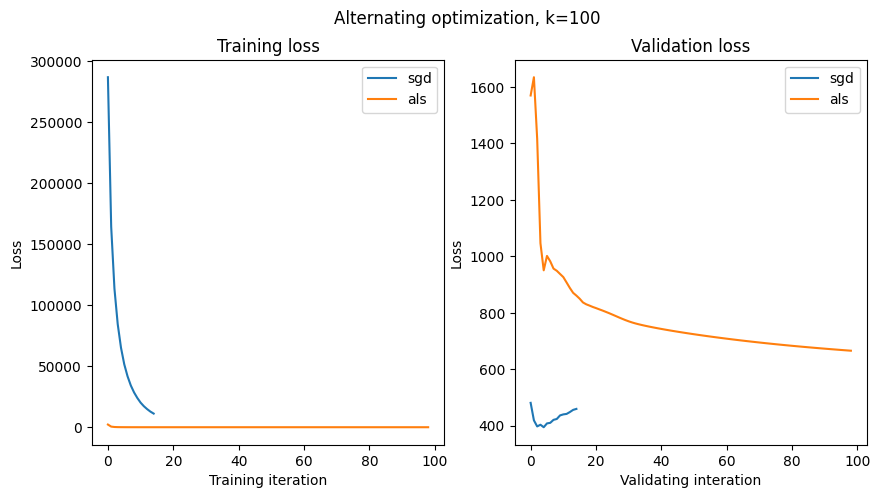

In [74]:
### Plot the validation and training losses over for each iteration
fig, ax = plt.subplots(1, 2, figsize = [10, 5])
fig.suptitle("Alternating optimization, k=100")

ax[0].plot(train_loss_sgd[1::], label = 'sgd')
ax[0].plot(train_loss_als[1::], label = 'als')
ax[0].set_title('Training loss')
ax[0].set_xlabel("Training iteration")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(val_loss_sgd[1::], label = 'sgd')
ax[1].plot(val_loss_als[1::], label = 'als')
ax[1].set_title("Validation loss")
ax[1].set_xlabel("Validating interation")
ax[1].set_ylabel("Loss")
ax[1].legend()

<class 'list'>


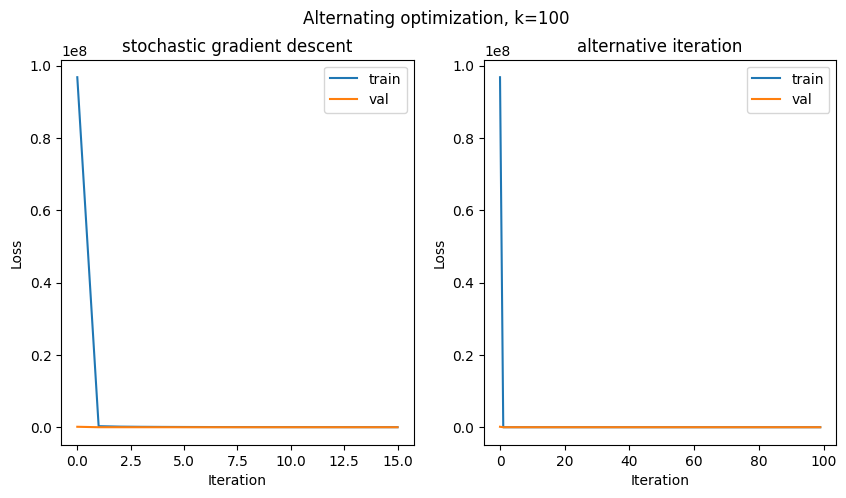

In [75]:
print(type(train_loss_sgd))
train_loss_sgd = np.array(train_loss_sgd)
val_loss_sgd = np.array(val_loss_sgd)
train_loss_als = np.array(train_loss_als)
val_loss_als = np.array(val_loss_als)
fig, ax = plt.subplots(1, 2, figsize = [10, 5])
fig.suptitle("Alternating optimization, k=100")

ax[0].plot(train_loss_sgd, label = 'train')
ax[0].plot(val_loss_sgd, label = 'val')
ax[0].set_title('stochastic gradient descent')
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(train_loss_als, label = 'train')
ax[1].plot(val_loss_als, label = 'val')
ax[1].set_title("alternative iteration")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Loss")
ax[1].legend()


# Autoencoder and t-SNE
Hereinafter, we will implement an autoencoder and analyze uts latent space via interpolations annd t-SNE. For this, we will use the famous Fasion-MNIST dataset


In [76]:
from typing import List
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import torchvision
from torchvision.datasets import FashionMNIST
import torch
from torch import nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ExponentialLR

import numpy as np

In [77]:
print(torch.cuda.is_available())

True


In [78]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


### download dataset and create dataset/dataloader

In [79]:
train_dataset = FashionMNIST(root = '../data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = FashionMNIST(root= '../data', transform = torchvision.transforms.ToTensor(), train=False, download = True)

In [80]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = 1024, shuffle = True, pin_memory=True, num_workers = 2)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = 1024, shuffle = False, pin_memory=True, num_workers = 2)

In [81]:
# numbers of data samples in each dataset
print(train_dataset.__len__())
# 60000
print(test_dataset.__len__())
# 10000

60000
10000


In [82]:
# batch size (minibatch size = 1024)
print(train_dataloader.__len__())
# 59
print(test_dataloader.__len__())
# 10

59
10


### check the output size

In [83]:
def conv_transpose_output_size(H_in, W_in, stride = 1, padding = 0, dilation = 1, kernel_size = 3, output_padding = 0):
    
    if H_in == W_in:
        H_out = (H_in - 1) * stride - 2 * padding + dilation * (kernel_size - 1) + output_padding + 1
        W_out = H_out
    else:
        print('should be square input')
        raise ValueError
    return H_out, W_out
    

In [84]:
output_size = []
output_size.append(conv_transpose_output_size(H_in=7, W_in=7, stride = 1, padding = 0, dilation=1, kernel_size=3, output_padding=0))
print(output_size)
output_size.append(conv_transpose_output_size(H_in = output_size[0][0], W_in = output_size[0][1], stride = 2, output_padding=1))
output_size.append(conv_transpose_output_size(H_in = output_size[1][0], W_in = output_size[1][1], stride=2, output_padding=1))
output_size.append(conv_transpose_output_size(H_in = output_size[2][0], W_in = output_size[2][1], padding=1))
output_size.append(conv_transpose_output_size(H_in = output_size[3][0], W_in = output_size[3][1], padding=1))
output_size.append(conv_transpose_output_size(H_in = output_size[4][0], W_in = output_size[4][1]))

[(9, 9)]


In [85]:
print(output_size)

[(9, 9), (20, 20), (42, 42), (42, 42), (42, 42), (44, 44)]


### confirm the output size by using dummy model

In [86]:
input = torch.randn(1024, 1, 28, 28)
kernel_size = (3, 3)
print('input shape: {}'.format(input.shape))
input = input.to(device)
encode = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=(3, 3)),
            nn.Conv2d(4, 16, kernel_size=(3, 3)),
            nn.MaxPool2d(2,2),
            nn.Conv2d(16, 32, kernel_size=(3, 3)),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 32, kernel_size=(3, 3)),
)
encode.to(device)
latent_factors = encode(input)
print('latent factors shape: {}'.format(latent_factors.shape))

decoder = nn.Sequential(
    nn.ConvTranspose2d(32, 32, kernel_size=kernel_size),
    nn.ConvTranspose2d(32, 16, kernel_size=kernel_size, stride = 2, output_padding=1),
    nn.ConvTranspose2d(16, 16, kernel_size=kernel_size, stride = 2, output_padding = 1),
    nn.ConvTranspose2d(16,16, kernel_size=kernel_size, padding =1),
    nn.ConvTranspose2d(16, 4, kernel_size= kernel_size, padding = 1),
    nn.ConvTranspose2d(4, 1, kernel_size=kernel_size)
)

decoder.to(device)
output = decoder(latent_factors)
print('output shape: {}'.format(output.shape))

input shape: torch.Size([1024, 1, 28, 28])
latent factors shape: torch.Size([1024, 32, 3, 3])
output shape: torch.Size([1024, 1, 28, 28])


### Autoencoder

In [87]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encode = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=(3, 3)),
            nn.LeakyReLU(),
            nn.Conv2d(4, 16, kernel_size=(3, 3)),
            nn.MaxPool2d(2,2),
            nn.LeakyReLU(),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.Conv2d(16, 32, kernel_size=(3,3)),
            nn.MaxPool2d(2, 2),
            nn.LeakyReLU(),
            nn.Conv2d(32, 32, kernel_size=(3, 3)),
            nn.LeakyReLU(),
            )
        self.decode = nn.Sequential(
            nn.ConvTranspose2d(32, 32, kernel_size=(3, 3)),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=(3, 3), stride = 2, output_padding= 1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16, 16, kernel_size=(3, 3), stride = 2, output_padding=1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(16, 16, kernel_size=(3, 3), padding=1),
            nn.ConvTranspose2d(16, 4, kernel_size=(3, 3), padding =1),
            nn.ConvTranspose2d(4, 1, kernel_size=(3, 3)),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        z = self.encode(x)
        x_approx = self.decode(z)

        assert x.shape == x_approx.shape
        return x_approx

print(Autoencoder())

Autoencoder(
  (encode): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): LeakyReLU(negative_slope=0.01)
    (10): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (11): LeakyReLU(negative_slope=0.01)
  )
  (decode): Sequential(
    (0): ConvTranspose2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), output_padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    

### train the autoencoder

In [88]:
model = Autoencoder().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = ExponentialLR(optimizer, gamma = 0.999)

log_every_batch = 20
max_epochs = 50
avg_train_loss = []
avg_test_loss = []

In [89]:
for epoch in range(max_epochs):
    model.train()
    train_loss_trace = []
    for batch, (x, label) in enumerate(train_dataloader):
        x = x.to(device)
        # predict
        predict = model(x)
        # evaluate reconstruction loss (mean square loss)
        loss = F.mse_loss(predict, x)
        # set 0 to the gradient
        optimizer.zero_grad()
        # calculate gradients by backward propagation
        loss.backward()
        # update parameters
        optimizer.step()
        # loss.detach() => separate a loss from the computational graph, and doesn't require gradient
        # detached tensor == tensor
        # tensor.item() == content
        train_loss_trace.append(loss.detach().item())
        if batch % log_every_batch == 0:
            print('Train: Epoch {}, batch {}, ====> loss {}'.format(epoch, batch, loss))
    
    # if you do not call loss.backward()
    # with torch.no_grad()
    with torch.no_grad():
        model.eval()
        test_loss_trace = []
        for batch, (x, label) in enumerate(test_dataloader):
            x = x.to(device)
            predict = model(x)
            loss = F.mse_loss(predict, x)
            test_loss_trace.append(loss.detach().item())
            if batch % log_every_batch == 0:
                print('Test: Epoch {}, batch {}, ====> loss {}'.format(epoch, batch, loss))
    _avg_train_loss = np.mean(train_loss_trace)
    avg_train_loss.append(_avg_train_loss)
    _avg_test_loss = np.mean(test_loss_trace)
    avg_test_loss.append(_avg_test_loss)
    print(f"Epoch {epoch} finished -average train loss {_avg_train_loss}, "
    f"average test loss {_avg_test_loss}")



Train: Epoch 0, batch 0, ====> loss 0.16013331711292267
Train: Epoch 0, batch 20, ====> loss 0.09437862783670425
Train: Epoch 0, batch 40, ====> loss 0.04736725240945816
Test: Epoch 0, batch 0, ====> loss 0.04256131500005722
Epoch 0 finished -average train loss 0.07903905351788311, average test loss 0.0422297403216362
Train: Epoch 1, batch 0, ====> loss 0.03468252345919609
Train: Epoch 1, batch 20, ====> loss 0.02998919039964676
Train: Epoch 1, batch 40, ====> loss 0.025809958577156067
Test: Epoch 1, batch 0, ====> loss 0.02399859018623829
Epoch 1 finished -average train loss 0.028447190173349138, average test loss 0.023757354356348515
Train: Epoch 2, batch 0, ====> loss 0.023207029327750206
Train: Epoch 2, batch 20, ====> loss 0.022209007292985916
Train: Epoch 2, batch 40, ====> loss 0.020589759573340416
Test: Epoch 2, batch 0, ====> loss 0.02043464593589306
Epoch 2 finished -average train loss 0.02166011042387809, average test loss 0.020236410945653916
Train: Epoch 3, batch 0, ====> 

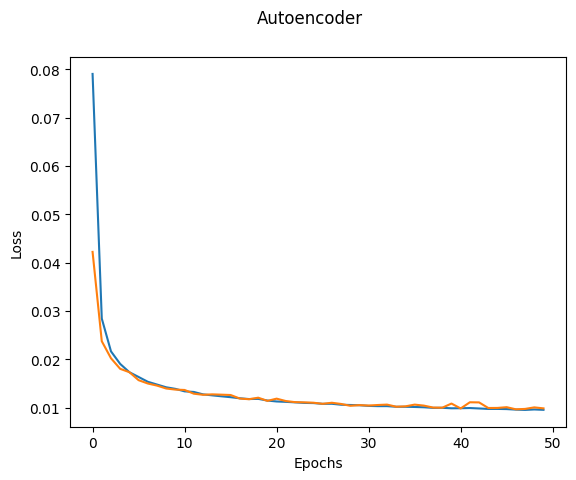

In [90]:
train_loss = np.array(avg_train_loss)
test_loss = np.array(avg_test_loss)
fig = plt.figure()
fig.suptitle("Autoencoder")

plt.plot(train_loss, label = 'train')
plt.plot(test_loss, label = 'test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### obtain latent factors

In [91]:
model.eval()
with torch.no_grad():
    latent = []
    for batch, (x, _) in enumerate(test_dataloader):
        latent.append(model.encode(x.to(device)).cpu())
    # concatenating latent factors for each input
    latent = torch.cat(latent)

In [92]:
print(type(latent))
print(latent.shape)
print(latent[0].shape)

<class 'torch.Tensor'>
torch.Size([10000, 32, 3, 3])
torch.Size([32, 3, 3])


### Dimensionality reduction onto 2-dim space for visualization
The shape of a latent factor is torch.Size([32, 3, 3]). To visualize this latent space, we need to reduce dimensionality reasonably.

- **PCA**
    - Linear
    - Capture global data latent structure
    - Find the largest variant direction

- **t-SNE** (t-distributed stochastic neighboring embeddings)
    - Non-Linear
    - Capture local data latent structure
    - Optimize low-dimensional embeddings for each data samples which can reconstruct local relationship between samples in the low dimensional space

### random sampling images to be visualized from test_dataset

In [93]:
n_vis_samples = 1000
indices = np.random.choice(len(latent), n_vis_samples, replace = False)
vis_samples = latent[indices]
print(vis_samples.shape)

torch.Size([1000, 32, 3, 3])


### PCA (sklearn)

In [94]:
coords_pca = PCA(n_components=2).fit_transform(vis_samples.reshape(n_vis_samples, -1))

### t-SNE (sklearn)

In [95]:
coords_tsne = TSNE(n_components=2, perplexity = 50).fit_transform(vis_samples.reshape(n_vis_samples, -1))

### Visuzalization

9


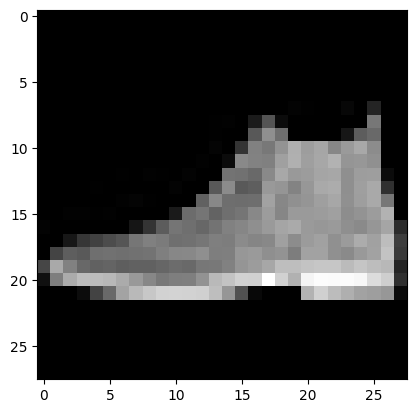

In [96]:
# image
plt.imshow(test_dataset[0][0].squeeze().numpy(), cmap='gray')
# label
print(test_dataset[0][1])

In [126]:
def latent_space_visualization(indices, coords, technique: str, ):
    fig, ax = plt.subplots(figsize = (10, 7))
    ax.set_title(technique)
    for idx, (x, y) in zip(indices, coords):
        im = OffsetImage(test_dataset[idx][0].squeeze().numpy(), zoom = 1)
        ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.annotate(str(test_dataset[idx][1]), (x, y))
    ax.update_datalim(coords)
    ax.autoscale()
    plt.show()

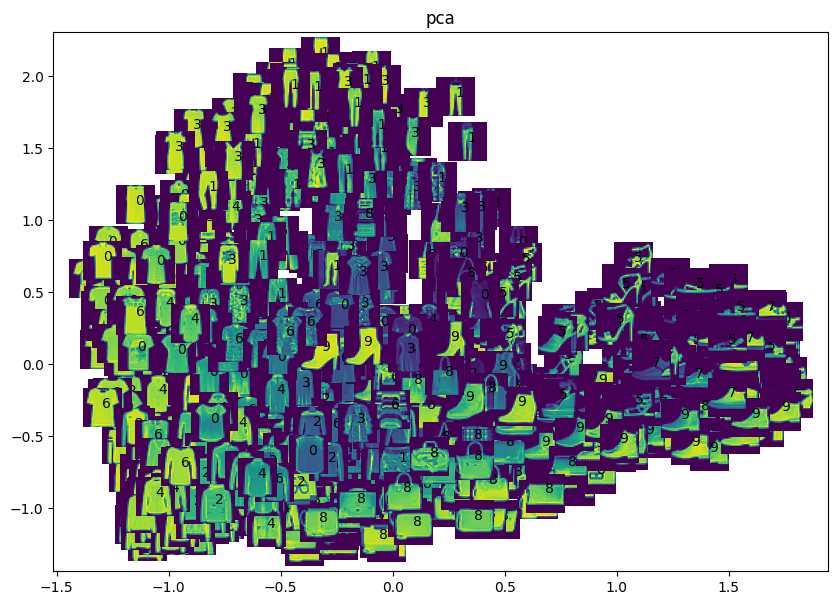

In [127]:
latent_space_visualization(indices, coords_pca, technique='pca')

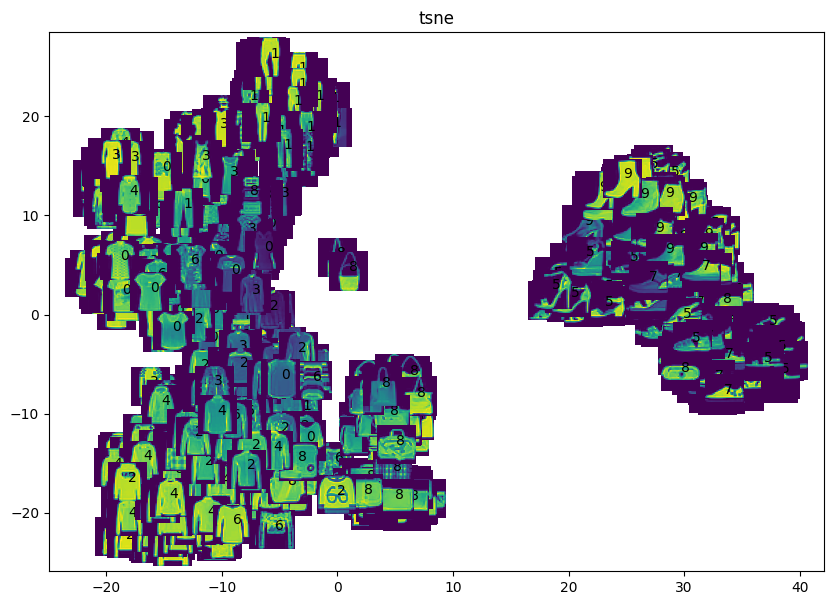

In [128]:
latent_space_visualization(indices, coords_tsne, technique='tsne')

### Linear interpolation on the latent space
- If the latent space has learned something meaningfull, we can leverage this for further analysis/downstream tasks
- Especially, we can interpolate some images by sampling intermediate latent factor from the latent space.
- For instance, we are going to generate latent variable by feeding input image to the encoder and linearly interpolate between them,
- By feeding the interpolated latent factors to the decoder, you can generate an intermediate (interpolated) image between two samples.

In [102]:
print(type(test_dataset[0][0]))
print(type(test_dataset[0][1]))

<class 'torch.Tensor'>
<class 'int'>


In [ ]:
"""
Test dataset:   torch.utils.data.Dataset
                Test images [tensor, int]

idx_i:          int
                Id for the first image

idx_j:          int
                Id for the second image

n:              n, optional, default: 1
                Number of intermediate interpolations
                (including original reconstrcutions)
"""

### Generate latent factors corresponding to the id of sample image

### select the end to end sample for interpolation

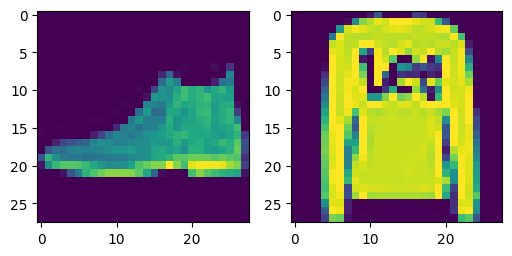

In [113]:
idx_i = 0
idx_j = 1
n = 10 # the number of interpolations
fig, ax = plt.subplots(1, 2, figsize = [6, 4])
ax[0].imshow(test_dataset[idx_i][0].squeeze().numpy())
ax[1].imshow(test_dataset[idx_j][0].squeeze().numpy())

In [111]:
# latent factor zi for i
# latent factor zj for j
z_i = model.encode(test_dataset[idx_i][0].to(device)[None, ...]).squeeze()
print(z_i.shape)
z_j = model.encode(test_dataset[idx_j][0].to(device)[None, ...]).squeeze()
print(z_j.shape)


torch.Size([32, 3, 3])
torch.Size([32, 3, 3])


[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


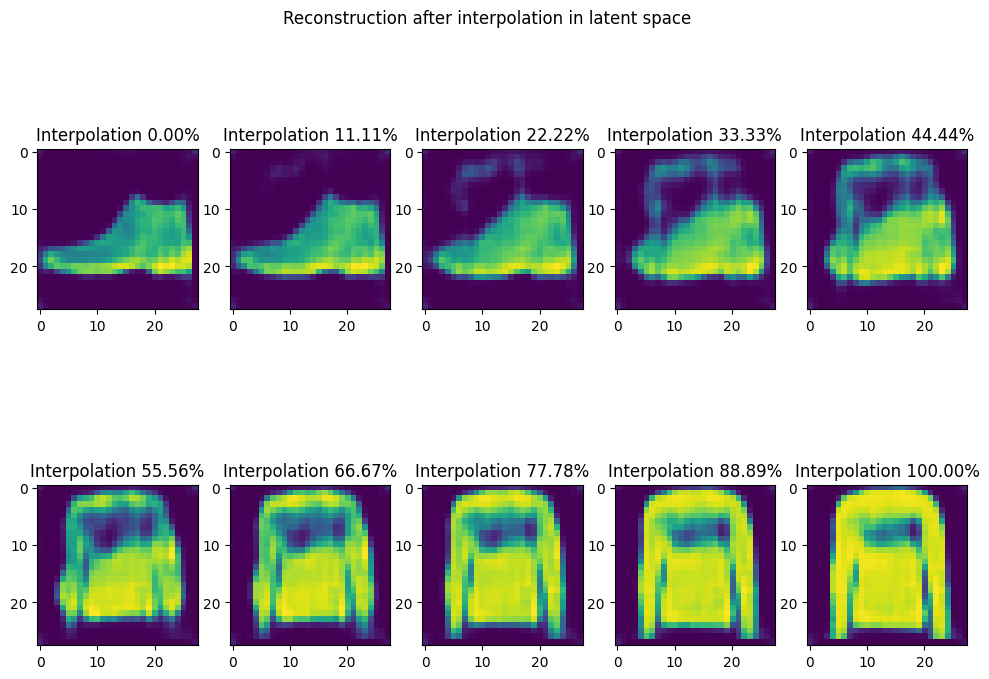

In [121]:
fig, ax = plt.subplots(2, n//2, figsize=[12,8])
ax = [sub for row in ax for sub in row]
fig.suptitle("Reconstruction after interpolation in latent space")

interpolated_0_and_1 = np.linspace(0, 1, n)
print(interpolated_0_and_1)

with torch.no_grad():
    for k, frac in enumerate(np.linspace(0, 1, n)):
        z_interpolated = frac * (z_j - z_i) + z_i
        reconstruction_interpolated = model.decode(z_interpolated[None, ...])
        ax[k].imshow(reconstruction_interpolated[0, 0].cpu().numpy())
        ax[k].set_title(f'Interpolation {frac*100:.2f}%')
plt.show()

In [137]:
def interpolate_between(model: Autoencoder, test_dataset: torch.utils.data.Dataset, idx_i:int, idx_j:int, n:int = 12):
    """
    Plot original images and the reconstruction of the linear interpolation in the latent space embeddings

    Parameters
    ----------
    model:               Autoencoder
                         The (trained) autoencoder
    test_dataset:        torch.utils.data.Dataset
                         Test images
    idx_i:               int
                         Id for first image
    idx_j:               int
                         Id for second image
    n:                   n, optional, default 12
                         Number of intermediate interpolations (including original reconstructions)
    """
    # setting to visualize original images
    fig, ax = plt.subplots(1, 2, figsize=[6, 4])
    fig.suptitle("Original Images")
    ax[0].imshow(test_dataset[idx_i][0][0].numpy())
    ax[1].imshow(test_dataset[idx_j][0][0].numpy())
    ax[0].set_title(str(test_dataset[idx_i][1]))
    ax[1].set_title(str(test_dataset[idx_j][1]))

    # obtain the corresponding latent factors 
    z_i = model.encode(test_dataset[idx_i][0].to(device)[None, ...]).squeeze()
    z_j = model.encode(test_dataset[idx_j][0].to(device)[None, ...]).squeeze()

    # setting to visualize interpolations
    fig, ax = plt.subplots(2, n//2, figsize = [15, 8])
    ax = [sub for row in ax for sub in row]
    fig.suptitle("reconstruction after interpolation in latent space")

    with torch.no_grad():
        for i, frac in enumerate(np.linspace(0, 1, n)):
            z_interpolated = frac * (z_j - z_i) + z_i
            reconstruction_interpolated = model.decode(z_interpolated[None, ...])
            ax[i].imshow(reconstruction_interpolated[0,0].cpu().numpy())
            ax[i].set_title(f"interpolation {frac*100:.2f}%")
    plt.show()


In [138]:
i, j = np.random.choice(test_dataset.__len__(), 2)

In [139]:
print(i, j)

2186 8131


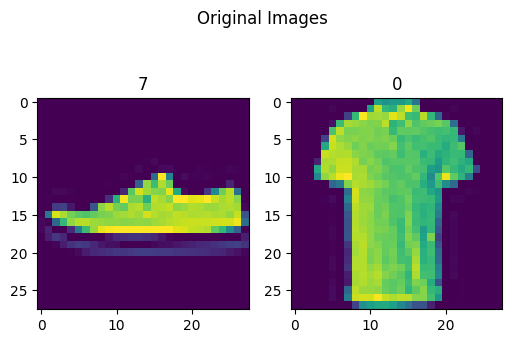

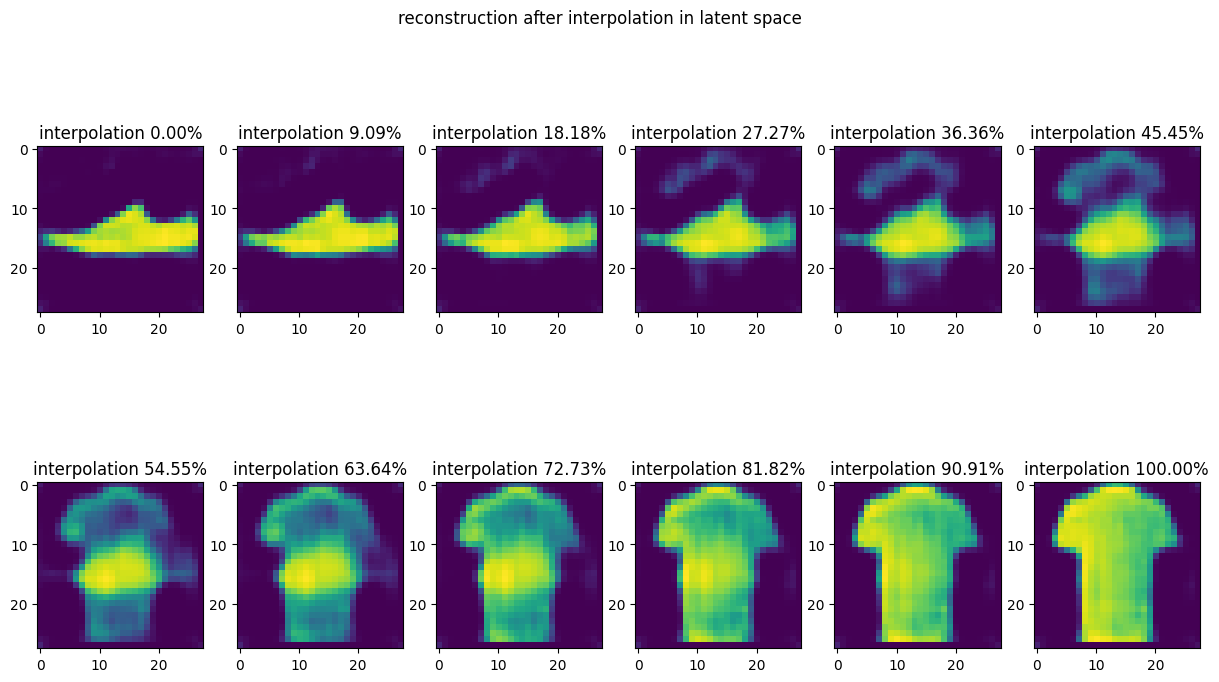

In [140]:
interpolate_between(model, test_dataset, i, j)